# 1 Understanding heteroskedasticity using simulated data 

The exercises below are intended to help you understand how heteroskedasticity influences estimates. To evaluate this, we will generate simulated data. This is often a useful exercise, if you want to understand how different data-generating processes influence the precision of different estimation methods.

1. In the first part of the exercise, we will generate a homoskedastic model with the following characteristics: $y_0 = β_0 + β_1x + u_0$ where $y_0$ is the dependent variable, $x$ is a uniformly distributed variable ranging from 8 to 15, $β_0 = 0$, $β_1 = 5$, and $u_0 ∼ N (0, σ^2)$, $σ^2 = 2$.

(a) Generate 1000 random draws from a uniform distribution ranging from 8 to 15 and store them in a variable named x. When generating ran- dom variables, it is important to set the seed of the random generation (i.e. tell the program how exactly to generate the same set of random variables each time). Set the seed to 1234.

In [2]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(1234)

# Generate random data for 1000 samples from [8,15]
x = np.random.uniform(low=8, high=15, size=1000)

print(x[:10])

[ 9.34063615 12.3547614  11.06409417 13.49751009 13.45983066  9.90814824
  9.93524979 13.61310524 14.70697548 14.13152844]


(b) Generate the scalars beta 0 and beta 1 equal to 0 and 5, respecitively.

In [3]:
# Set scalar coefficients
beta_0 = 0
beta_1 = 5

(c) Generate the variable homoskedastic error, which is normally dis- tributed, with mean 0 and variance of 2.

In [4]:
homoskedastic_error = np.random.normal(loc=0, scale=2, size=1000)

(d) Generate a variable homoskedastic y which is defined according to the model outlined above.

In [5]:
# Add the variables
y = beta_0 + beta_1 * x + homoskedastic_error
print(y[:10])

[48.07430393 61.45891902 58.0830464  67.62440355 67.92422587 50.44924756
 48.09930518 67.93384555 70.69791769 70.37813554]


(e) Create a scatter plot of homoskedastic y and x. Add a regression line to it, in order to be able to see that the errors are homoskedastic. How can you tell that that is the case?

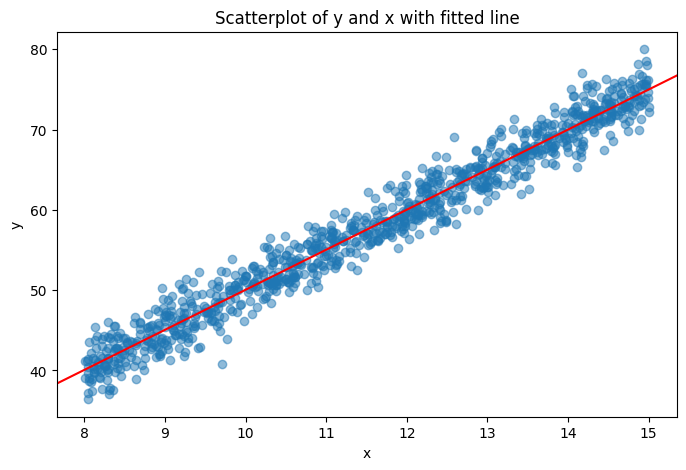

In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

# Estimate the model
X = sm.add_constant(x)         # Design-Matrix with Intercept
model = sm.OLS(y, X).fit()     # OLS

# Plot the data and the fitted line
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, alpha=0.5)
abline_plot(model_results=model, ax=ax, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of y and x with fitted line')
plt.show()

We can see that the Data is homoskedastic because the variance of the error seems to be constant along x.

(f) Generate the variable homoskedastic error pred equal to: $\hat{u}_0 = y_0 − \hat{y}_0$

In [7]:
# Predict y values using the model
y_pred = model.predict(X)

# Calculate the residuals (homoskedastic errors)
homoskedastic_error_pred = y - y_pred

np.set_printoptions(suppress=True, precision=4)

print("Summe der Residuen:", homoskedastic_error_pred.sum())
print(homoskedastic_error_pred.sum()) 


Summe der Residuen: 2.2737367544323206e-12
2.2737367544323206e-12


(g) Create a scatter plot of homoskedastic y and homoskedastic error pred. Add a regression line to it, in order to be able to see that the errors are homoskedastic. How can you tell that that is the case?

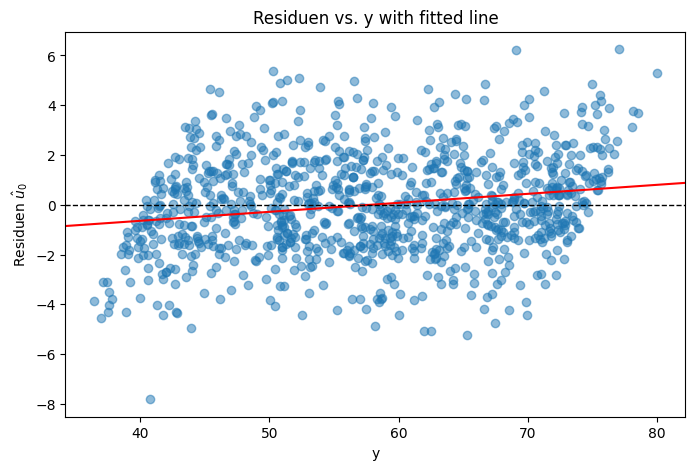

In [8]:
# 1. Regression der Residuen auf y schätzen
X2 = sm.add_constant(y)  
model2 = sm.OLS(homoskedastic_error_pred, X2).fit()

# 2. Scatterplot und fitted line
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(y, homoskedastic_error_pred, alpha=0.5)
abline_plot(model_results=model2, ax=ax, color='red')

ax.axhline(0, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('y')
ax.set_ylabel('Residuen $\hat u_0$')
ax.set_title('Residuen vs. y with fitted line')
plt.show()

The slope of the fitted line is:
$$
\frac{\mathrm{Cov}(\hat u, y)}{\mathrm{Var}(y)}
= \frac{\mathrm{Cov}(\hat u, \hat{y}+\hat{u})}{\mathrm{Var}(y)}
= \frac{\mathrm{Var}(\hat u)}{\mathrm{Var}(y)} > 0,
$$

because

$$
\mathrm{Cov}(\hat u, y) = \mathrm{Var}(\hat u),
\quad
\mathrm{Cov}(\hat u, x) = 0.
$$

If we would plot $\hat{u}$ against $x$ or $\hat{y}$ the fitted line would be horizontal at zero, because of the Zero-Conditional-Mean (Orthoghonality-Condition). But if we plot the Residuals against the total $y$ ($y=\hat{y}+\hat{u}$) we see an upward slope, since $y$ itself contains $\hat{u}$. As $y$ grows the residual grows, because the model predicts worse at very small and big values. This mechanical necessity creates a positive correlation between  $\hat{u}$ and $y$.

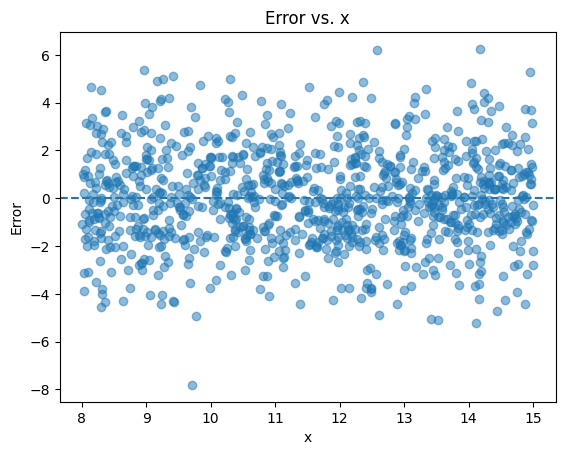

In [9]:
plt.scatter(x, homoskedastic_error_pred, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error vs. x')
plt.show()

## 2 Heteroskedastic Model

In the second part of the exercise, we will generate a heteroskedastic model with the following characteristics:

$$
y_1 = \beta_0 + \beta_1 x + u_1
$$

where $y_1$ is the dependent variable, and

$$
u_1 = u_0 \times \lvert x - \bar{x} \rvert
$$

with $\bar{x}$ being the mean of $x$. The rest of the variables ($\beta_0$, $\beta_1$, $x$, $u_0$) are defined as before. This model will illustrate the consequences of “bad” heteroskedasticity.


(a) Generate a scalar mean x, which is equal to the mean value of the simulated variable x.

In [10]:
# Comupute the mean
mean_x = np.mean(x)
print("Mean of x:", mean_x)

Mean of x: 11.561632708237907


(b) Generate a variable called abs distance to mean equal to $\lvert x - \bar{x} \rvert$

In [12]:
abs_distance_to_mean = np.abs(x - mean_x)
print("Distance to mean:", abs_distance_to_mean[:10])

Distance to mean: [2.221  0.7931 0.4975 1.9359 1.8982 1.6535 1.6264 2.0515 3.1453 2.5699]


(c) Generate a variable called heteroskedastic error 1 ($u_1$) equal to $u_o \times \lvert x - \bar{x} \rvert$

In [13]:
heteroskedastic_error_1 = homoskedastic_error * abs_distance_to_mean

(d) Generate a variable heteroskedastic y 1 which is defined according to the model outlined above.

In [ ]:
heteroskedastic_y_1 = beta_0 + beta_1 * x + heteroskedastic_error_1
print(heteroskedastic_y_1[:10])


[49.7484 61.5241 56.695  67.7525 68.4857 51.0429 47.1115 67.7954 64.6117
 69.9393]


(e) Create a scatter plot of heteroskedastic y 1 and x. Add a regression line to it, in order to be able to see that the errors are heteroskedastic. How can you tell that that is the case?

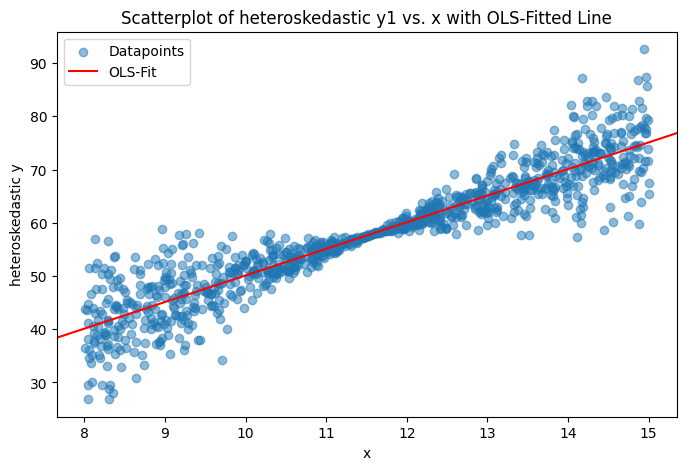

In [17]:
# Estimate the model so we can add the fitted line
model1 = sm.OLS(heteroskedastic_y_1, X).fit()  # OLS

# Create the scatterplot with the fitted line
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, heteroskedastic_y_1, alpha=0.5, label='Datapoints')
abline_plot(model_results=model1, ax=ax, color='red', label='OLS-Fit')
ax.set_xlabel('x')
ax.set_ylabel('heteroskedastic y')
ax.set_title('Scatterplot of heteroskedastic y1 vs. x with OLS-Fitted Line')
ax.legend()
plt.show()

(f) Estimate the model with simple OLS.

In [18]:
# Call the output of the model estimated in (e)
summary1 = model1.summary()
print(summary1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     6057.
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:48:03   Log-Likelihood:                -2850.9
No. Observations:                1000   AIC:                             5706.
Df Residuals:                     998   BIC:                             5716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0979      0.755      0.130      0.8

(g) Estimate the model with robust standard errors. Is there a difference in the estimate $β1$? What is the difference in the standard errors of $β1$? Why did they change in this direction?

In [20]:
import statsmodels.api as sm

# OLS with Robsut Standard Errors: Covariance Matrix Estimation HC1
modell1_robust = sm.OLS(heteroskedastic_y_1, X).fit(cov_type='HC1')
print(modell1_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3425.
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:59:24   Log-Likelihood:                -2850.9
No. Observations:                1000   AIC:                             5706.
Df Residuals:                     998   BIC:                             5716.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0979      1.010      0.097      0.9

Because our error variance grows with $\lvert x - \bar{x}\rvert$, the constant‑variance assumption of ordinary least squares is violated. As a result, the usual (non‑robust) formula for standard errors underestimates how much sampling variability there really is. Robust standard errors correct for this by explicitly allowing each observation’s error to have its own variance, so they inflate the estimated uncertainty to reflect the true heteroskedastic spread. In practice this means the robust SEs are larger—and more trustworthy—whenever the variance of the residuals is not constant.


(h) Perform the Beusch-Pagan test on the simple OLS model. Does the test reject the null hypothesis of “no heteroskedasticity”?

In [25]:
# Breusch-Pagan Test for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(model1.resid, model1.model.exog)

print(f"LM Statistic: {lm_stat:.4f}")
print(f"LM p-value:  {lm_pvalue:.4f}")
print(f"F Statistic:  {f_stat:.4f}")
print(f"F p-value:    {f_pvalue:.4f}")

LM Statistic: 4.0537
LM p-value:  0.0441
F Statistic:  4.0621
F p-value:    0.0441


The F‑statistic’s p‑value is below 0.05, so we reject the null hypothesis of homoskedasticity at the 5% significance level.

## 3 Good Heteroskedastic Model

In the third part of the exercise, we will generate a heteroskedastic model with the following characteristics:

$$
y_2 = \beta_0 + \beta_1 x + u_2
$$

where $y_2$ is the dependent variable and

$$
u_2 = u_0 \times \bigl(d_{\max} - \lvert x - \bar{x}\rvert\bigr),
\qquad
d_{\max} = \max_i \lvert x_i - \bar{x}\rvert.
$$

The rest of the variables ($\beta_0$, $\beta_1$, $x$, $u_0$, $\bar{x}$) are defined as before. This model will illustrate the consequences of “good” heteroskedasticity.


(a) Generate a scalar `dmax` equal to $$\max_i |x_i - \bar x|\,. $$  

In [26]:
# (a) Maximum distance from the mean
dmax = np.max(np.abs(x - mean_x))

(b) Generate a variable `heteroskedastic_error_2` equal to $$u_0 \times \bigl(d_{\max} - |x - \bar{x}|\bigr)\,. $$  

In [27]:
# (b) "Good" heteroskedastic error
heteroskedastic_error_2 = homoskedastic_error * (dmax - np.abs(x - mean_x))

 (c) Generate a variable `y2` defined by the model above.  

In [29]:
heteroskedastic_y_2 = beta_0 + beta_1 * x + heteroskedastic_error_2

 (d) Create a scatter plot of `y2` versus `x` and add the OLS fitted line to visualize heteroskedasticity. Explain how you see the pattern.  


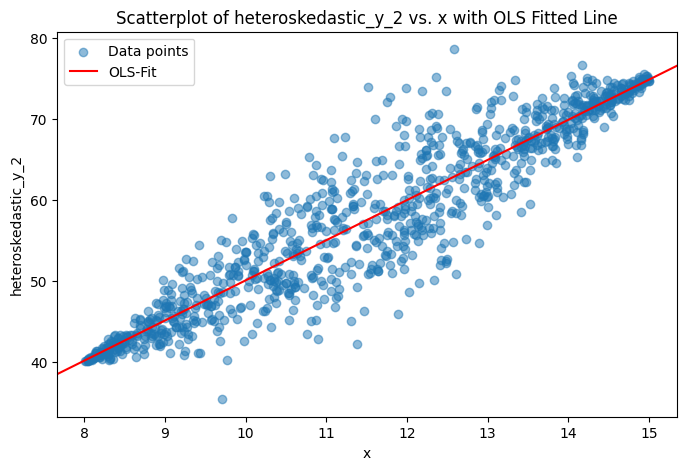

In [30]:
model2 = sm.OLS(heteroskedastic_y_2, X).fit()
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, heteroskedastic_y_2, alpha=0.5, label='Data points')
abline_plot(model_results=model2, ax=ax, color='red', label='OLS-Fit')
ax.set_xlabel('x')
ax.set_ylabel('heteroskedastic_y_2')
ax.set_title('Scatterplot of heteroskedastic_y_2 vs. x with OLS Fitted Line')
ax.legend()
plt.show()

(e) Estimate the model with simple OLS.

In [31]:
# Call summary of model estimated in (d)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     6761.
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:49:32   Log-Likelihood:                -2788.5
No. Observations:                1000   AIC:                             5581.
Df Residuals:                     998   BIC:                             5591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4293      0.709      0.606      0.5

(f) Estimate the model with robust standard errors. What is the difference in the standard errors of β1? Why are the standard errors different with the robust model?

In [32]:
model2_robust = sm.OLS(heteroskedastic_y_2, X).fit(cov_type='HC1')
print(model2_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 2.060e+04
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:50:34   Log-Likelihood:                -2788.5
No. Observations:                1000   AIC:                             5581.
Df Residuals:                     998   BIC:                             5591.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4293      0.415      1.035      0.3

In both the ordinary and robust models, the estimated slope $\hat\beta_1$ remains essentially the same (about 4.963), but their reported standard errors differ markedly.

- Under the (incorrect) homoskedasticity assumption, the standard error of $\hat\beta_1$ is approximately 0.060.  
- When we apply the **HC1** robust correction, it falls to about 0.035.

This happens because in our “good” heteroskedasticity design the residual variance is highest near the center of the $x$‑range and lowest at the extremes—exactly where observations are most informative about the slope. The classical OLS formula treats all observations as having equal variance and therefore overstates the true sampling variability. The robust estimator, by contrast, allows each residual to have its own variance, effectively down‑weighting the high‑variance middle observations and up‑weighting the low‑variance extremes. The result is a smaller, more accurate standard error for $\hat\beta_1$.
